In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# from nufit 5.3 http://www.nu-fit.org/?q=node/278

# normal ordering, degrees, eV^2, symmetrized errors, 3l = 31 for NO, 3l = 32 for IO

# degrees
theta12 = 33.66
theta12_err = 0.5*(0.73+0.70)
theta23 = 49.1
theta23_err = 0.5*(1.0+1.3)
theta13 = 8.54
theta13_err = 0.5*(0.11+0.11)
deltaCP = 197
deltaCP_err = 0.5*(41+25)
# eV^2
delta2_m21 = 7.41e-5
delta2_m21_err = 0.5*(0.21+0.20)*1e-5
delta2_m3l = 2.511e-3
delta2_m3l_err = 0.5*(0.027+0.027)*1e-3

# inverted ordering

# degrees
theta12_inv = 33.67
theta12_inv_err = 0.5*(0.73+0.71)
theta23_inv = 49.5
theta23_inv_err = 0.5*(0.9+1.2)
theta13_inv = 8.57
theta13_inv_err = 0.5*(0.11+0.11)
deltaCP_inv = 286
deltaCP_inv_err = 0.5*(27+32)
# eV^2
delta2_m21_inv = 7.41e-5
delta2_m21_inv_err = 0.5*(0.21+0.20)*1e-5
delta2_m3l_inv = -2.498e-3
delta2_m3l_inv_err = 0.5*(0.032+0.024)*1e-3

def get_PMNS(theta12, theta23, theta13, deltaCP, alpha1, alpha2):

    theta12 = np.radians(theta12)
    theta23 = np.radians(theta23)
    theta13 = np.radians(theta13)

    rot_23 = np.array([[
        [1, 0, 0],
        [0, np.cos(theta23), np.sin(theta23)],
        [0, -np.sin(theta23), np.cos(theta23)]
        ]])

    rot_13 = np.array([[
        [np.cos(theta13), 0, np.sin(theta13)*np.exp(-1j*deltaCP)],
        [0, 1, 0],
        [-np.sin(theta13)*np.exp(1j*deltaCP), 0, np.cos(theta13)]
        ]])

    rot_12 = np.array([[
        [np.cos(theta12), np.sin(theta12), 0],
        [-np.sin(theta12), np.cos(theta12), 0],
        [0, 0, 1]
        ]])
    
    majorana = np.diag([np.exp(1j*alpha1), np.exp(1j*alpha2), 1])

    return (rot_23 @ rot_13 @ rot_12 @ majorana)[0]


# todo: expand PMNS with sterile neutrino here


In [3]:
alpha1 = 0
alpha2 = 0

U_mat = get_PMNS(theta12, theta23, theta13, deltaCP, alpha1, alpha2)

U = {}
for flavor_i in range(3):
    flavor = ["nue", "numu", "nutau"][flavor_i]
    for mass_i in range(3):
        U[(flavor, mass_i)] = U_mat[flavor_i, mass_i]


In [5]:
# assuming normal ordering, setting m1 = 0
m1 = 0
m2 = np.sqrt(delta2_m21)
m3 = np.sqrt(delta2_m3l)

c = 299792458 # m / s
hbar = 6.582119569e-16 # eV s

# from https://en.wikipedia.org/wiki/Neutrino_oscillation
def get_prob(alpha, beta, L_over_E, U, m1, m2, m3):

    if "anti" in alpha:
        sign = -1
    else:
        sign = 1

    if "anti" in alpha and not "anti" in beta:
        return 0

    P = 0
    if alpha == beta:
        P = 1
    for j in range(3):
        for k in range(3):
            if not (j > k):
                continue

            delta_m2_jk = [m1, m2, m3][j]**2 - [m1, m2, m3][k]**2

            # https://www.wolframalpha.com/input?i=GeV+fermi+%2F+%284+hbar+c%29
            P -= 4 * np.real(np.conj(U[(alpha,j)]) * U[(beta,j)] * U[(alpha,k)] * np.conj(U[(beta,k)])) * np.sin(1.26693268 * delta_m2_jk * L_over_E)**2
            P += sign * 2 * np.imag(np.conj(U[(alpha,j)]) * U[(beta,j)] * U[(alpha,k)] * np.conj(U[(beta,k)])) * np.sin(2 * 1.26693268 * delta_m2_jk * L_over_E)
            
    return P


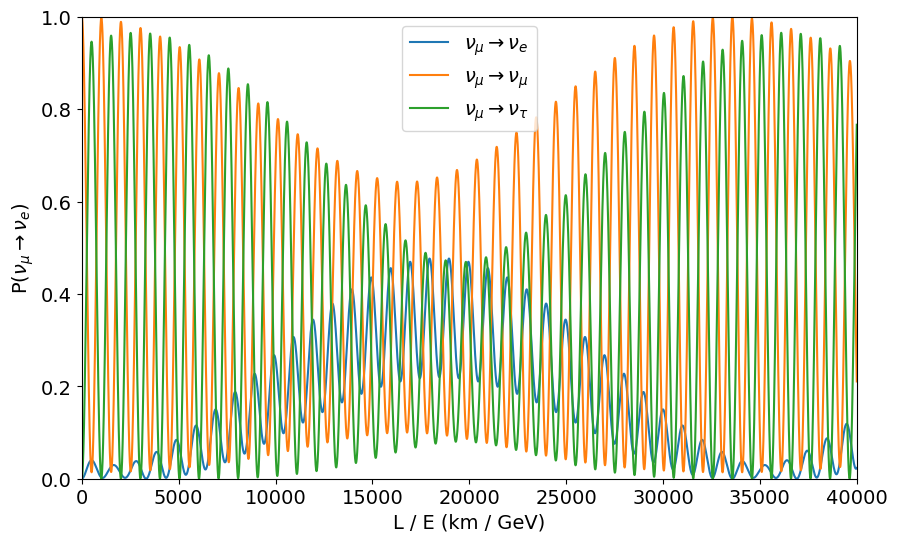

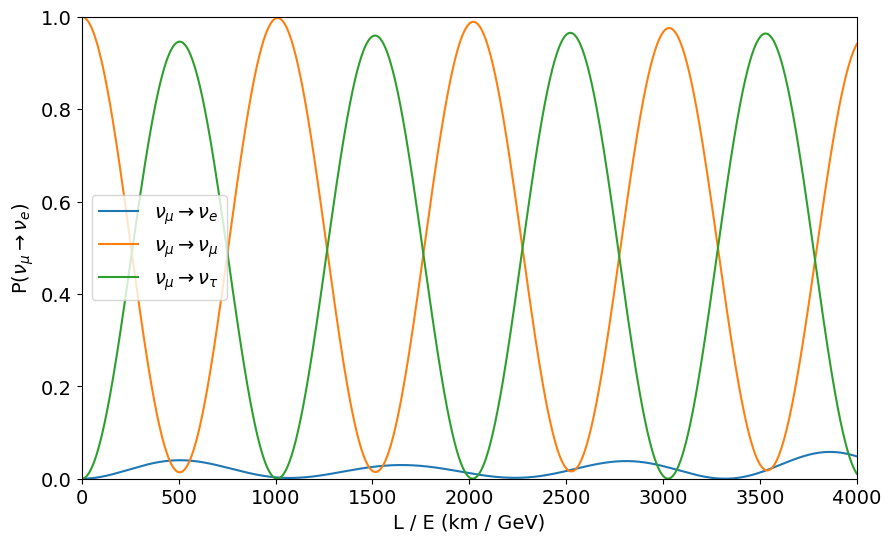

In [8]:
L_over_E_vals = np.linspace(0, 40000, 10000)
numu_to_nue_prob_vals = [get_prob("numu", "nue", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
numu_to_numu_prob_vals = [get_prob("numu", "numu", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
numu_to_nutau_prob_vals = [get_prob("numu", "nutau", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 6))
plt.plot(L_over_E_vals, numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$")
plt.plot(L_over_E_vals, numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$")
plt.plot(L_over_E_vals, numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$")
plt.xlim(0, 40000)
plt.ylim(0, 1)
plt.xlabel("L / E (km / GeV)")
plt.ylabel(r"P($\nu_\mu \rightarrow \nu_e$)")
plt.legend()
plt.show()

L_over_E_vals = np.linspace(0, 4000, 10000)
numu_to_nue_prob_vals = [get_prob("numu", "nue", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
numu_to_numu_prob_vals = [get_prob("numu", "numu", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
numu_to_nutau_prob_vals = [get_prob("numu", "nutau", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 6))
plt.plot(L_over_E_vals, numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$")
plt.plot(L_over_E_vals, numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$")
plt.plot(L_over_E_vals, numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$")
plt.xlim(0, 4000)
plt.ylim(0, 1)
plt.xlabel("L / E (km / GeV)")
plt.ylabel(r"P($\nu_\mu \rightarrow \nu_e$)")
plt.legend()
plt.show()
